In [990]:
import setup
from circuits import * 
from number import *
import math
import pandas as pd

In [1018]:
def prime_factors(n):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

In [991]:
def parity(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif (x % 2 == 1):
        return -1
    else:
        return 1
    
vparity = np.vectorize(parity)

In [1061]:
def generate_dataset(m, k):
    p = primes[k] # dimension of vector
    ords = np.zeros((m,p), dtype=int)

    for i in range(m):
        for j in range(1,p):
            ords[i][j] = order(j, primes[k+i])
    return ords


In [1062]:
m = 100
k = 50

In [1063]:
ords = generate_dataset(m, k)

In [1067]:
rand = np.random.randint(1, p, size=(m,p-1))
for i in range(m):
    rand[i][0] = 0
    rand[i][1] = 1

In [1071]:
ords = pd.DataFrame(ords)
rand = pd.DataFrame(rand)

In [956]:
ords = ords.applymap(parity)
rand = rand.applymap(parity)

In [957]:
from sklearn.metrics.pairwise import pairwise_kernels

In [958]:
K_ord = pairwise_kernels(ords, ords)
K_rand = pairwise_kernels(rand, rand)

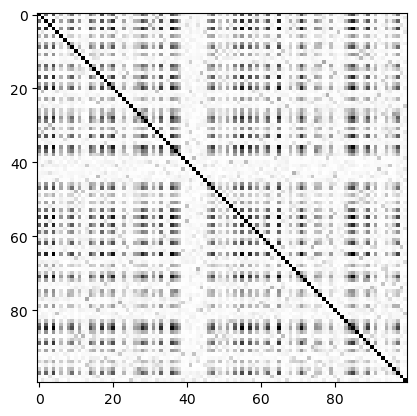

In [959]:
plt.imshow(abs(K_ord), cmap="Greys")

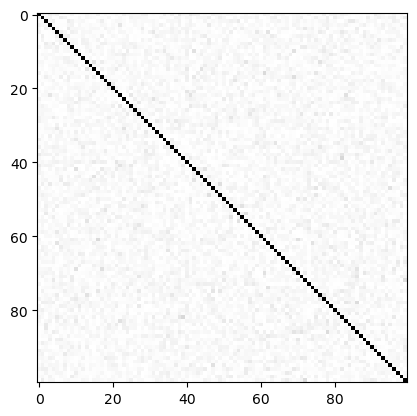

In [960]:
plt.imshow(abs(K_rand), cmap="Greys")

In [ ]:
ords_R = ords.reindex(idx)

In [ ]:
K_ord_R = pairwise_kernels(ords_R, ords_R)

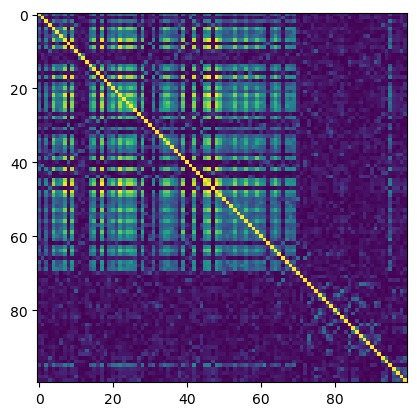

In [ ]:
plt.imshow(abs(K_ord_R))

In [ ]:
sums = abs(np.array(ords.apply(sum, axis=1)))

In [977]:
sums[sums.argsort()]

array([  0,   2,   2,   4,   4,   4,   4,   6,   6,   6,   6,   8,   8,
         8,  10,  10,  12,  12,  12,  12,  12,  14,  14,  14,  14,  14,
        16,  18,  18,  18,  18,  20,  20,  20,  20,  22,  22,  22,  22,
        24,  24,  24,  26,  28,  28,  28,  28,  30,  34,  38,  94,  96,
        96,  96,  98, 100, 102, 104, 106, 108, 110, 112, 112, 112, 114,
       114, 114, 116, 116, 116, 116, 118, 120, 124, 126, 126, 156, 164,
       170, 172, 174, 174, 176, 180, 182, 182, 186, 188, 198, 198, 200,
       202, 202, 214, 218, 224, 228, 230, 230, 230], dtype=int64)

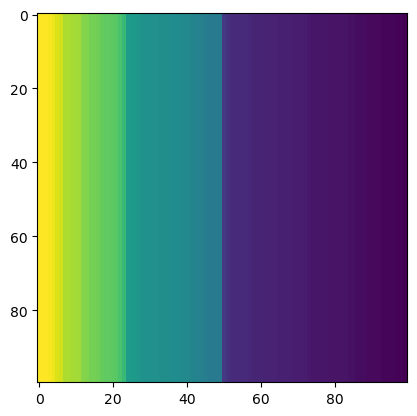

In [978]:
plt.imshow(np.tile(sums[sums.argsort()[::-1]], (100,1)))

In [980]:
ords_R = ords.reindex(sums.argsort())

In [981]:
ords_R.apply(sum, axis=1)

12      0
87     -2
93     -2
16     -4
10      4
     ... 
36    224
55    228
4     230
65    230
85    230
Length: 100, dtype: int64

In [982]:
K_ord_R = pairwise_kernels(ords_R, ords_R)

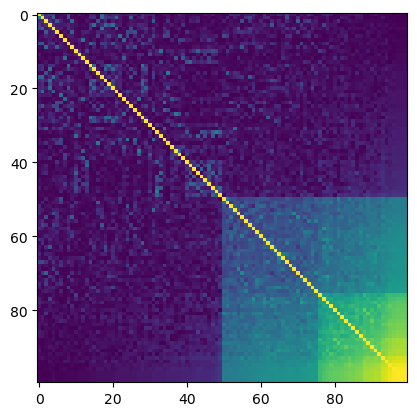

In [983]:
plt.imshow(abs(K_ord_R))

In [ ]:
ords_R.tail(5)

0    1    2    3    4    5    6    7    8    9    ...  223  224  225  226  \
36    0   -1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
55    0   -1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
4     0   -1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
65    0   -1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
85    0   -1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

    227  228  229  230  231  232  
36    1    1    1    1    1    1  
55    1    1    1    1    1    1  
4     1    1    1    1    1    1  
65    1    1    1    1    1    1  
85    1    1    1    1    1    1  

[5 rows x 233 columns]

In [1016]:
primes[k+85]-1

768

In [1019]:
prime_factors(768)

[2, 2, 2, 2, 2, 2, 2, 2, 3]

In [1020]:
ords_R.head(5)

0    1    2    3    4    5    6    7    8    9    ...  223  224  225  226  \
12    0   -1    1    1   -1    1   -1   -1    1   -1  ...   -1    1   -1    1   
87    0   -1    1    1   -1    1   -1   -1    1   -1  ...   -1    1   -1    1   
93    0   -1    1   -1   -1    1    1    1    1   -1  ...   -1   -1   -1    1   
16    0   -1    1    1   -1   -1   -1    1    1   -1  ...   -1   -1   -1    1   
10    0   -1    1    1   -1    1   -1   -1    1   -1  ...    1    1   -1    1   

    227  228  229  230  231  232  
12   -1    1   -1    1    1   -1  
87   -1    1   -1   -1    1    1  
93   -1   -1    1   -1    1   -1  
16    1    1    1   -1    1   -1  
10   -1   -1    1   -1    1    1  

[5 rows x 233 columns]

In [1021]:
primes[k+12]-1

306

In [1023]:
prime_factors(306)

[2, 3, 3, 17]

# Making rule more complex

In [ ]:
ords

0    1    2    3    4    5    6    7    8    9    ...  223  224  225  226  \
0     0    1   29  232   29  232  232  116   29  116  ...  232  116   58  116   
1     0    1  119  119  119  119   17  238  119  119  ...  238  238  119  119   
2     0    1   24  120   12   40   20  240    8   60  ...  120   80    3    6   
3     0    1   50  125   25   25  250  125   50  125  ...  250  250  125   50   
4     0    1   16  256    8  256  256  256   16  128  ...   32  256   16  128   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95    0    1  419  419  419  419  419  419  419  419  ...  419  419  419  838   
96    0    1  852  142  426  284  852  284  284   71  ...  852  213  142  284   
97    0    1  428  856  214  856  856  856  428  428  ...  428  856  214  856   
98    0    1  858  858  429  429  143  429  286  429  ...  143  286   33   33   
99    0    1  431  431  431  862  431  862  431  431  ...  431  862  431  431   

    227  228  229  230  231  232  
0   232  232   58  232   58    2  
1   238  238   14  238  238  119  
2   240  240  120   48   15   60  
3   125  250  250  250   10  125  
4    32  128  256  256  128  128  
..  ...  ...  ...  ...  ...  ...  
95  419  419  838  419  838  838  
96   71  142  852  426  213  426  
97  428  107  856  856  856  107  
98  143  143   33   39  143  429  
99  862  431  431  431  431  431  

[100 rows x 233 columns]

In [1078]:
def parity_3(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif ((x+1) % 3 == 0):
        return -1
    else:
        return 1
    
vparity_3 = np.vectorize(parity_3)

def cluster(dataset, n):
    X = dataset
    clustering = SpectralClustering(n_clusters=n,
        assign_labels='discretize',
        random_state=0).fit(X)

    labels = clustering.labels_
    idx = labels.argsort()

    #labels[labels.argsort()]

    dataset_R = dataset.reindex(idx)
    return (dataset_R, idx)


In [1079]:
ords = pd.DataFrame(ords)
rand = pd.DataFrame(rand)

In [1080]:
ords = ords.applymap(parity_3)
rand = rand.applymap(parity_3)

In [1083]:
K_ord = pairwise_kernels(ords, ords)
K_rand = pairwise_kernels(rand, rand)

In [1104]:
rand_R = cluster(rand, 2)
K_rand_R = pairwise_kernels(rand_R, rand_R)

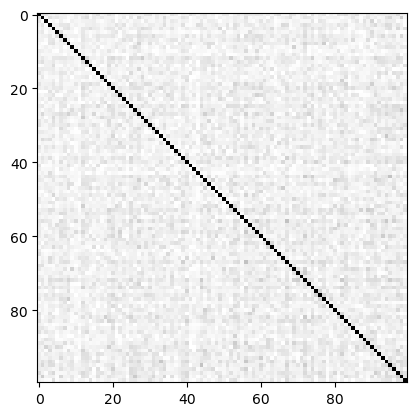

In [1102]:
plt.imshow(abs(K_rand), cmap="Greys")

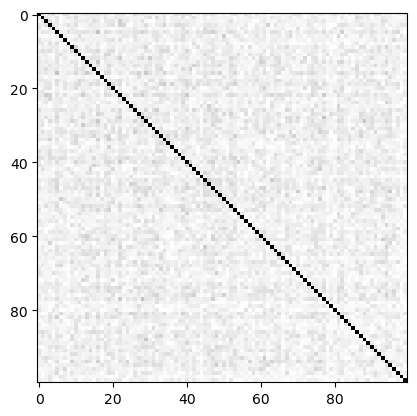

In [1105]:
plt.imshow(abs(K_rand_R), cmap="Greys")

In [1130]:
ords_R = cluster(ords, 9)
K_ords_R = pairwise_kernels(ords_R, ords_R)

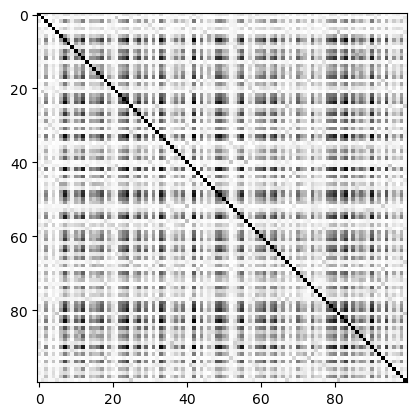

In [1101]:
plt.imshow(abs(K_ord), cmap="Greys")

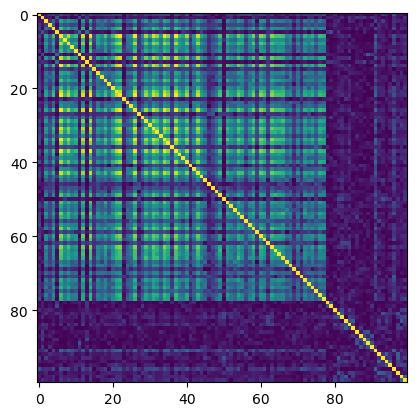

In [1131]:
plt.imshow(abs(K_ords_R))

## Testing correlations with prime factorisation

In [1273]:
primes = [i for i in range(0,10**5) if is_prime(i)]

In [1367]:
def generate_dataset(m, k):
    p = primes[k] # dimension of vector
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    t=0
    while i<m:
        if (prime_factors(primes[k+t]-1).count(2)>1 or len(prime_factors(primes[k+t]-1))==2):
            t+=1
            continue
        for j in range(1,p):
            ords[i][j] = order(j, primes[k+t])
            idx[i] = primes[k+t]
        t+=1
        i+=1
    return (ords, idx)


In [1533]:
def parity_16(x):
    x = int(np.abs(x))
    if   (x==0):
        return 0
    elif ((x+1) % 16 == 0):
        return -1
    else:
        return 1
    
vparity_3 = np.vectorize(parity_3)

In [1534]:
ords, idx = generate_dataset(100, 20)

In [1290]:
ords, idx = generate_dataset(100, 20)

In [1535]:
ords = pd.DataFrame(ords)

In [1536]:
ords = ords.applymap(parity_3)

In [1537]:
K_ord = pairwise_kernels(ords, ords)

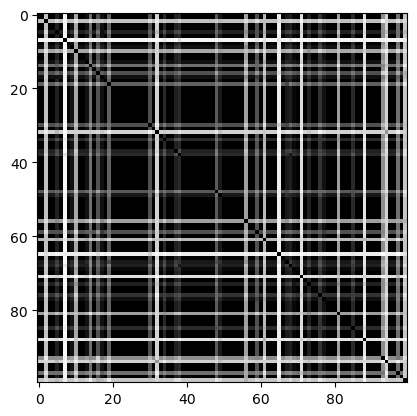

In [1538]:
plt.imshow(abs(K_ord), cmap="Greys")

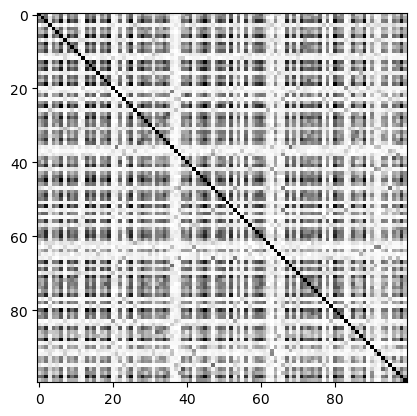

In [1373]:
plt.imshow(abs(K_ord), cmap="Greys")

In [1539]:
ords_R, idx_R = cluster(ords, 2)
K_ords_R = pairwise_kernels(ords_R, ords_R)

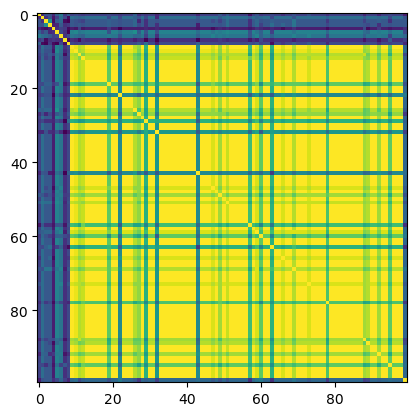

In [1540]:
plt.imshow(abs(K_ords_R))

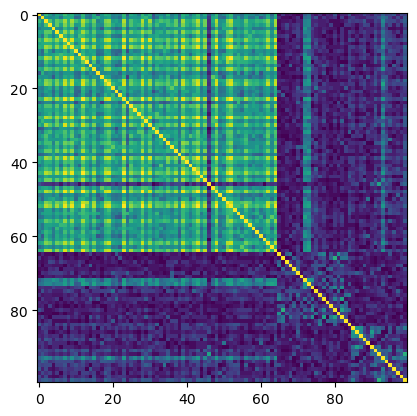

In [1379]:
plt.imshow(abs(K_ords_R))

In [1385]:
ords_R.head(5)

0   1   2   3   4   5   6   7   8   9   ...  63  64  65  66  67  68  69  \
0    0   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1  -1   
61   0   1   1   1   1  -1  -1  -1   1   1  ...   1   1   1   1   1   1   1   
60   0   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   1   
59   0   1  -1   1   1   1   1   1  -1   1  ...  -1   1   1   1   1   1   1   
58   0   1   1   1   1  -1   1   1  -1   1  ...   1  -1   1  -1   1  -1   1   

    70  71  72  
0    1  -1   1  
61   1   1   1  
60   1  -1   1  
59   1   1   1  
58  -1   1   1  

[5 rows x 73 columns]

In [1388]:
prime_factors(idx[54]-1)

[2, 3, 7, 23.0]

In [1407]:
import collections

In [1430]:
a = []
for i in range(1, int(idx[54])):
    a.append(order(i, int(idx[54])))


In [1434]:
a_freq = collections.Counter(a)

In [1435]:
a_freq

Counter({1: 1,
         483: 264,
         322: 132,
         966: 264,
         161: 132,
         46: 22,
         69: 44,
         138: 44,
         23: 22,
         7: 6,
         42: 12,
         3: 2,
         6: 2,
         21: 12,
         14: 6,
         2: 1})

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

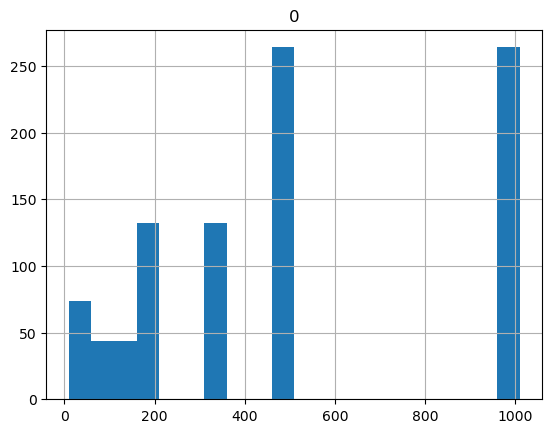

In [1417]:
df = pd.DataFrame([a])
df = df.T
df.hist(bins=list(range(10,1050,50)))

In [1480]:
abs(ords.apply(sum, axis=1)).sort_values(ascending=False)

45    72
6     72
19    72
80    72
88    72
      ..
83     2
12     2
79     2
20     2
23     2
Length: 100, dtype: int64

In [1484]:
abs(ords.apply(sum, axis=1)).values[6]

72

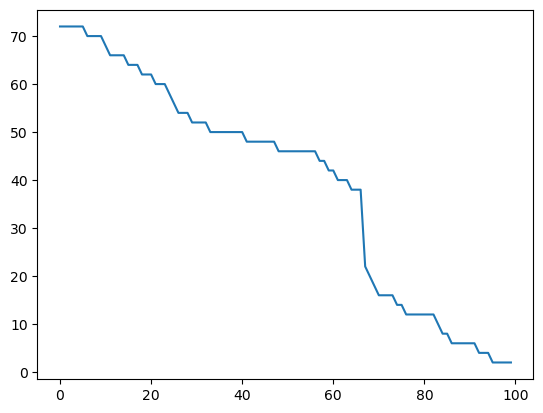

In [1487]:
plt.plot(abs(ords.apply(sum, axis=1)).sort_values(ascending=False).values)

In [1468]:
ords_R =  ords.reindex(abs(ords.apply(sum, axis=1)).sort_values(ascending=False).index)

In [1469]:
K_ords_R = pairwise_kernels(ords_R, ords_R)

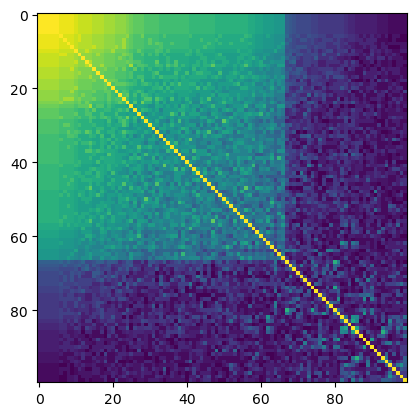

In [1474]:
plt.imshow(abs(K_ords_R))

In [1506]:
a = pd.Series(a)

In [1510]:
a

0       1
1     270
2     810
3     135
4     405
     ... 
67    810
68     27
69    810
70    810
71    810
Length: 72, dtype: int64

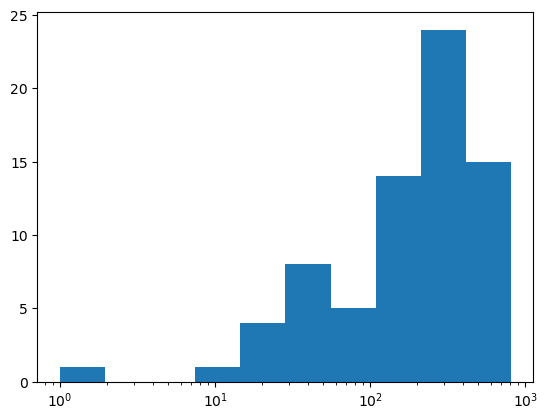

In [1511]:
def plot_loghist(x, bins):
    hist, bins = np.histogram(x, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins)
    plt.xscale('log')

plot_loghist(a, 10)

In [1517]:
a_freq = collections.Counter(a)

In [1518]:
a_freq

Counter({1: 1,
         270: 5,
         810: 15,
         135: 8,
         405: 19,
         27: 3,
         90: 2,
         162: 6,
         30: 2,
         18: 1,
         54: 2,
         81: 3,
         45: 4,
         9: 1})

In [1520]:
a = set(a)

In [1526]:
a

{1, 9, 18, 27, 30, 45, 54, 81, 90, 135, 162, 270, 405, 810}

In [1529]:
ords_R.head(1)

0   1   2   3   4   5   6   7   8   9   ...  63  64  65  66  67  68  69  \
45   0   1   1   1   1   1   1   1   1   1  ...   1   1   1   1   1   1   1   

    70  71  72  
45   1   1   1  

[1 rows x 73 columns]

In [1532]:
prime_factors(idx[45]-1)

[2, 3, 3, 3, 3, 5.0]

In [1525]:
for i in a:
    print(i+1)

2
163
136
10
811
46
271
82
19
406
55
91
28
31


# Semiprime technique

In [1565]:
import sympy as sp

In [1557]:
semiprimes = pd.read_csv(r"semiprimes.csv")

In [1566]:
semiprimes.applymap(sp.totient)

0
0    3480
1    3312
2    1800
3    2400
4    3432
..    ...
995  7224
996  6372
997  5952
998  6760
999  7168

[1000 rows x 1 columns]

In [1580]:
semiprimes = semiprimes.values.reshape(1000,)

In [1626]:
def generate_dataset(m, k):
    p = k # dimension of vector
    ords = np.zeros((m,p), dtype=int)
    idx = np.zeros(m) 
    
    i=0
    t=0
    while i<m:
        if (prime_factors(semiprimes[k+t])[0]<10):
            t+=1
            continue
        for j in range(1,p):
            ords[i][j] = order(j, semiprimes[k+t])
            idx[i] = semiprimes[k+t]
        t+=1
        i+=1
        print(i)
    return (ords, idx)


In [1627]:
ords, idx = generate_dataset(100, 50)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [1634]:
ords[6]

array([   0,    1,  904, 1808,  452, 1808, 1808, 1808,  904,  904, 1808,
       1808, 1808,  452, 1808,  904,  226,   -1,  226,  904, 1808,  452,
       1808, 1808, 1808,  904,  904, 1808, 1808, 1808,  452, 1808,  904,
        226,   -1,  226,  904, 1808,  452, 1808, 1808, 1808,  904,  904,
       1808, 1808, 1808,  452, 1808,  904])

In [1637]:
prime_factors(idx[10])

[47, 83.0]

In [1640]:
sp.totient(int(idx[10]))

3772

In [2076]:
def parity_2(x):
    if   (x==0 or x==-1):
        return 0
    
    x = int(np.abs(x))
    if ((x) % 2 == 1):
        return -1
    else:
        return 1
    
vparity_2 = np.vectorize(parity_2)

In [2077]:
ords = pd.DataFrame(ords)

In [2078]:
ords_p = ords.applymap(parity_2)

In [2079]:
K_ord = pairwise_kernels(ords_p, ords_p)

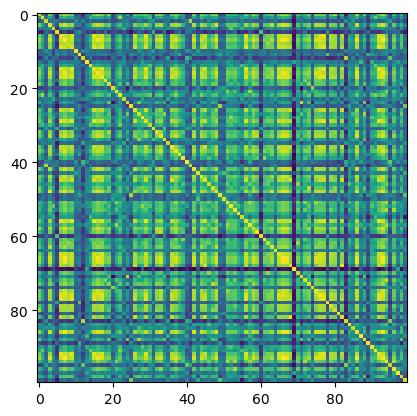

In [2080]:
plt.imshow(abs(K_ord))

In [2081]:
ords_r = ords_p.reindex(abs(ords_p.apply(sum, axis=1)).sort_values(ascending=False).index)

In [2082]:
K_ords_r = pairwise_kernels(ords_r, ords_r)

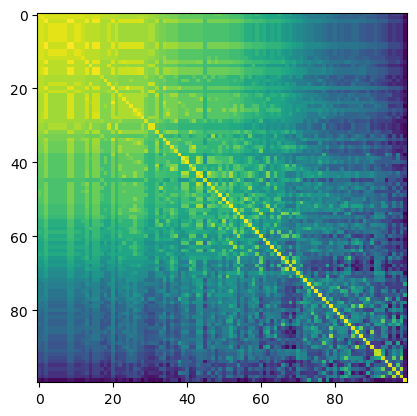

In [2083]:
plt.imshow(abs(K_ords_r))

In [2135]:
labels = ords_r.apply(sum, axis=1) > 35

In [2136]:
dataset = pd.DataFrame({"x":idx[ords_r.index], "y": labels.values})

In [2159]:
X_train, X_test, y_train, y_test = train_test_split(dataset['x'].values.reshape(-1,1), dataset['y'].values, test_size=0.33)

In [2160]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2161]:
# Linear SVC
clf = make_pipeline(StandardScaler(),
                    LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.48484848484848486

In [2162]:
# Logistic Regression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5757575757575758

In [2163]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=10, max_iter=3000000).fit(X_train, y_train)
clf.score(X_test, y_test)

0.5757575757575758

In [2164]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=200, random_state=0)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.42424242424242425

In [2166]:
def _brute_kernel(x1,x2):
    a = ords_r.iloc[list(idx[ords_r.index]).index(x1)].values
    b = ords_r.iloc[list(idx[ords_r.index]).index(x2)].values
    
    return np.abs(np.dot(a, b))

    
def brute_kernel(X, Y):
    K = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            K[i][j] = _brute_kernel(X[i], Y[j])
    
    return K

In [2167]:
my_k = brute_kernel(dataset['x'].values, dataset['x'].values)

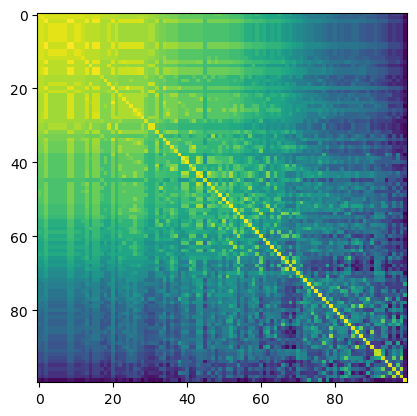

In [2168]:
plt.imshow(my_k)

In [2171]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
clf = svm.SVC(kernel=brute_kernel)
clf.fit(X_train, y_train)

SVC(kernel=<function brute_kernel at 0x000001A99008DD38>)

In [2172]:
clf.score(X_test, y_test)

0.9696969696969697